In [83]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jenkspy
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [85]:
%%R

# install.packages('geojsonio')
# install.packages('RColorBrewer')
# install.packages('rgdal')

NULL


In [86]:
%%R

require('tidyverse')
library('ggbeeswarm')
library(geojsonio)
library(RColorBrewer)
library(rgdal)

In [87]:
import pandas as pd

## Heat Pump usage for heating, by state

In [88]:
# This data is from 2020 RECS Survey Data from U.S. Energy Information Administration 
# Link: https://www.eia.gov/consumption/residential/data/2020/index.php?view=state

df = pd.read_excel("State Space Heating.xlsx", na_values=0)

In [89]:
df.drop(df.columns[[8, 9, 10, 11]], axis=1, inplace=True)
df.drop([0, 1, 2, 3, 4, 5, 67], axis=0, inplace=True)

In [90]:
df['Unnamed: 5'] = pd.to_numeric(df['Unnamed: 5'], errors='coerce')

In [91]:
df.head()

,Preliminary data release date: June 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
6,Alabama ...,1.9,0.79,42,0.8,42.0,N,N
7,Alaska ...,0.26,0.09,36,Q,NaN,0.09,36
8,Arizona ...,2.68,1.34,50,0.76,28.0,Q,Q
9,Arkansas ...,1.14,0.63,55,0.26,23.0,N,N
10,California ...,13.18,7.75,59,0.65,5.0,0.12,1


In [92]:
df.rename(columns={
    'Preliminary data release date: June 2022':'state',
    'Unnamed: 1':'pop_in_mill',
    'Unnamed: 2':'furnace_mill',
    'Unnamed: 3':'furnace_pct',
    'Unnamed: 4':'hp_mill',
    'Unnamed: 5':'hp_pct',
    'Unnamed: 6':'steam_hot_water_boiler_mill',
    'Unnamed: 7':'steam_hot_water_boiler_pct'
    }, inplace=True)

In [93]:
df.state = df.state.str.strip()

In [94]:
df.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', nan,
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [95]:
na_states = df[(df.hp_pct.isnull()) & (df.state.notnull())]
na_states

,state,pop_in_mill,furnace_mill,furnace_pct,hp_mill,hp_pct,steam_hot_water_boiler_mill,steam_hot_water_boiler_pct
7,Alaska,0.26,0.09,36,Q,NaN,0.09,36
12,Colorado,2.26,1.71,76,Q,NaN,0.2,9
13,Connecticut,1.38,0.81,59,Q,NaN,0.32,24
19,Hawaii,0.47,Q,Q,Q,NaN,Q,Q
20,Idaho,0.66,0.48,73,Q,NaN,Q,Q
28,Maine,0.56,0.25,45,Q,NaN,0.18,31
32,Michigan,3.92,3.24,83,Q,NaN,0.33,9
33,Minnesota,2.23,1.58,71,Q,NaN,0.35,16
37,Montana,0.43,0.28,64,Q,NaN,0.04,10
40,New Hampshire,0.54,0.29,53,Q,NaN,0.13,25


In [96]:
df_states = df[df.hp_pct.notnull()]
# df_states.hp_pct = df_states.hp_pct.fillna(0)

In [97]:
states_hp = df_states[df_states.columns[[0, 5]]]
states_hp

,state,hp_pct
6,Alabama,42.0
8,Arizona,28.0
9,Arkansas,23.0
10,California,5.0
14,Delaware,21.0
15,District of Columbia,15.0
16,Florida,32.0
18,Georgia,29.0
21,Illinois,2.0
22,Indiana,7.0


In [98]:
breaks = jenkspy.jenks_breaks(states_hp.hp_pct, n_classes=6)
breaks

[2.0, 5.0, 10.0, 15.0, 23.0, 32.0, 46.0]

In [102]:
breaks = [2.0, 4.0, 9.0, 15.0, 23.0, 32.0, 46.0]

In [103]:
states_hp['cut_jenks'] = pd.cut(states_hp.hp_pct, bins=breaks, labels=['bucket1', 'bucket2', 'bucket3', 'bucket4', 'bucket5', 'bucket6'])



In [104]:
states_hp.sort_values('hp_pct')

,state,hp_pct,cut_jenks
31,Massachusetts,2.0,NaN
21,Illinois,2.0,NaN
44,New York,3.0,bucket1
42,New Jersey,4.0,bucket1
55,South Dakota,5.0,bucket2
10,California,5.0,bucket2
48,Ohio,5.0,bucket2
24,Iowa,5.0,bucket2
43,New Mexico,6.0,bucket2
22,Indiana,7.0,bucket2


In [100]:
states_hp.sort_values('cut_jenks', ascending=False)

,state,hp_pct,cut_jenks
6,Alabama,42.0,bucket6
56,Tennessee,39.0,bucket6
54,South Carolina,46.0,bucket6
45,North Carolina,42.0,bucket6
61,Virginia,30.0,bucket5
16,Florida,32.0,bucket5
18,Georgia,29.0,bucket5
8,Arizona,28.0,bucket5
34,Mississippi,32.0,bucket5
27,Louisiana,23.0,bucket4


In [112]:
states_hp.hp_pct.describe()

count    35.000000
mean     17.342857
std      12.988553
min       2.000000
25%       6.500000
50%      14.000000
75%      25.500000
max      46.000000
Name: hp_pct, dtype: float64

In [15]:
states_hp.to_csv('states_heat_pump.csv', index=False)

### Create Hexmap based on the data

In [94]:
%%R

# Load this file. (Note: I stored in a folder called DATA)
spdf <- geojson_read("us_states_hexgrid.geojson",  what = "sp")

In [95]:
%%R

# install.packages('broom')
# install.packages('rgeos')
# install.packages('ggforce')

NULL


In [96]:
%%R

library(broom)
library(rgeos)

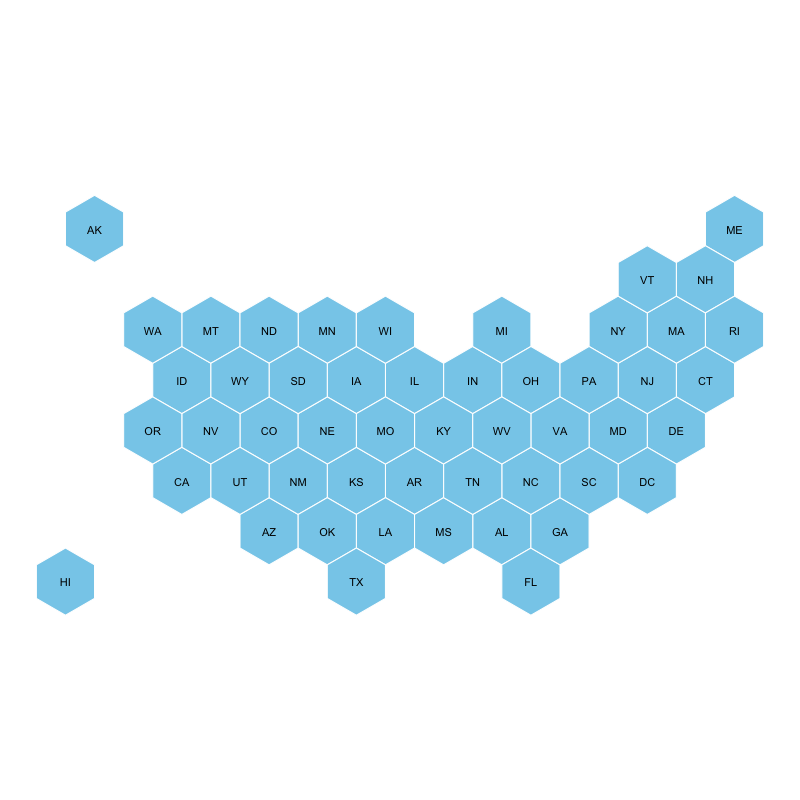

In [97]:
%%R -w 800 -h 800

# I need to 'fortify' the data to be able to show it with ggplot2 (we need a data frame format)

spdf@data = spdf@data %>% mutate(google_name = gsub(" \\(United States\\)", "", google_name))
spdf_fortified <- tidy(spdf, region = "google_name")

# Calculate the centroid of each hexagon to add the label:

centers <- cbind.data.frame(data.frame(gCentroid(spdf, byid=TRUE), id=spdf@data$iso3166_2))
 
# Now I can plot this shape easily as described before:
ggplot() +
  geom_polygon(data = spdf_fortified, aes( x = long, y = lat, group = group), fill="skyblue", color="white") +
  geom_text(data=centers, aes(x=x, y=y, label=id)) +
  theme_void() +
  coord_map()

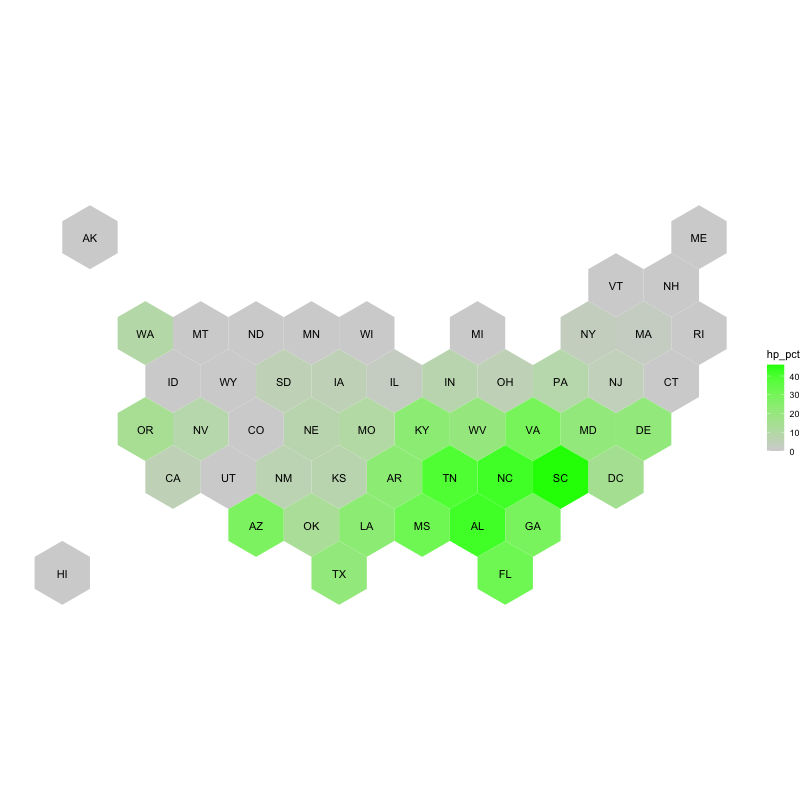

In [98]:
%%R -w 800 -h 800

# Merge geospatial and numerical information
spdf_fortified <- spdf_fortified %>%
  left_join(. , hp, by=c("id"="state")) 
 
centers <- cbind.data.frame(data.frame(gCentroid(spdf, byid=TRUE), id=spdf@data$iso3166_2))

# Make a first chloropleth map
# ggplot() +
#   geom_polygon(data = spdf_fortified, aes(fill = hp_pct, x = long, y = lat, group = group)) +
# #   scale_fill_gradient(trans = "log") +
#   scale_colour_gradient(low = "white", high = "black") + 
#   geom_text(data=centers, aes(x=x, y=y, label=id)) +
#   theme_void() +
#   coord_map()

ggplot() +
  geom_polygon(data = spdf_fortified, aes(fill = hp_pct, x = long, y = lat, group = group)) +
  scale_fill_gradient(low = "lightgray", high = "green", na.value = "lightgray") +
  geom_text(data=centers, aes(x=x, y=y, label=id)) +
  theme_void() +
  coord_map()



# Heat Pump Google Trends

<AxesSubplot: xlabel='week'>

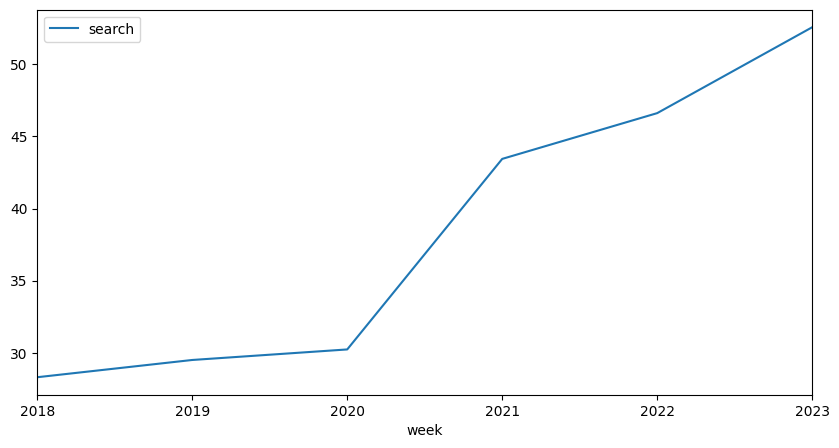

In [72]:
hp_df = pd.read_csv("heatpump.csv")

hp_df.reset_index(inplace=True)
new_header = hp_df.iloc[0] #grab the first row for the header
hp_df = hp_df[1:] #take the data less the header row
hp_df.columns = new_header #set the header row as the df header
hp_df.columns = ['week', 'search']
hp_df['week'] = pd.to_datetime(hp_df['week'])
hp_df.search = hp_df.search.astype(int)
hp_year = hp_df.resample("Y", on="week").mean().reset_index()
hp_year.plot(x='week', y='search', figsize=(10, 5))

<AxesSubplot: xlabel='week'>

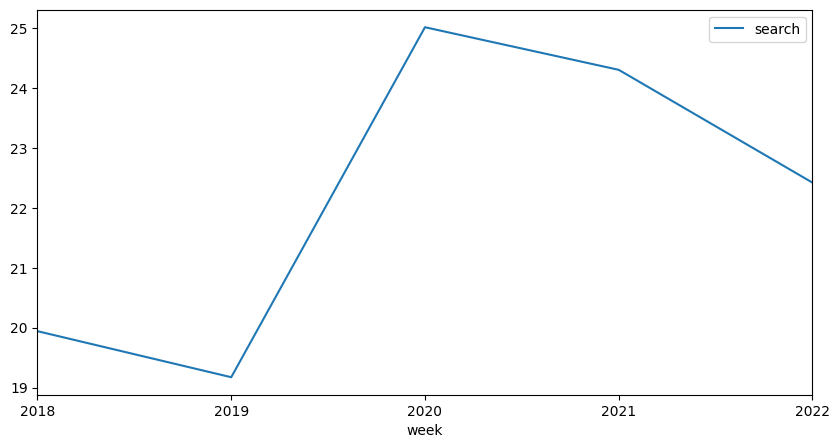

In [75]:
ac_df = pd.read_csv('air-conditioner.csv')

ac_df.reset_index(inplace=True)

new_header = ac_df.iloc[0] #grab the first row for the header
ac_df = ac_df[1:] #take the data less the header row
ac_df.columns = new_header #set the header row as the df header
ac_df.columns = ['week', 'search']
ac_df['week'] = pd.to_datetime(ac_df['week'])
ac_df.search = ac_df.search.astype(int)
ac_year = ac_df.resample("Y", on="week").mean().reset_index()
ac_year.plot(x='week', y='search', figsize=(10, 5))

<AxesSubplot: xlabel='week'>

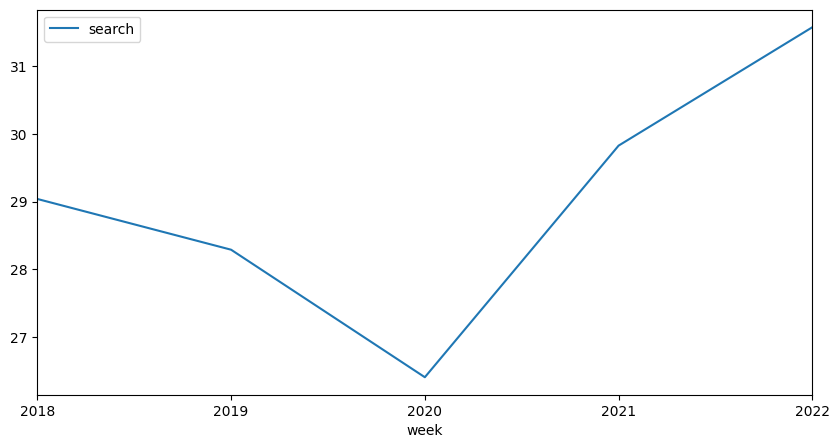

In [76]:
gf_df = pd.read_csv('gas-furnace.csv')

gf_df.reset_index(inplace=True)

new_header = gf_df.iloc[0] #grab the first row for the header
gf_df = gf_df[1:] #take the data less the header row
gf_df.columns = new_header #set the header row as the df header

gf_df.columns = ['week', 'search']

gf_df['week'] = pd.to_datetime(gf_df['week'])

gf_df.search = gf_df.search.astype(int)

gf_year = gf_df.resample("Y", on="week").mean().reset_index()

gf_year.plot(x='week', y='search', figsize=(10, 5))

<AxesSubplot: xlabel='week'>

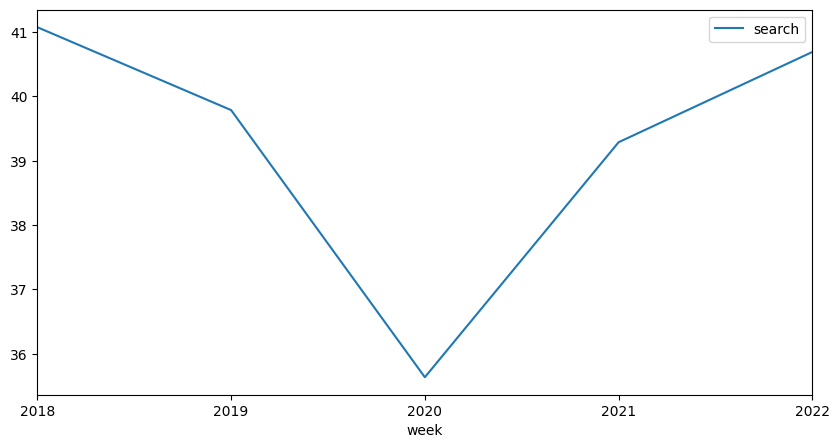

In [77]:
of_df = pd.read_csv('oil-furnace.csv')

of_df.reset_index(inplace=True)

new_header = of_df.iloc[0] #grab the first row for the header
of_df = of_df[1:] #take the data less the header row
of_df.columns = new_header #set the header row as the df header

of_df.columns = ['week', 'search']

of_df['week'] = pd.to_datetime(of_df['week'])

of_df.search = of_df.search.astype(int)

of_year = of_df.resample("Y", on="week").mean().reset_index()

of_year.plot(x='week', y='search', figsize=(10, 5))

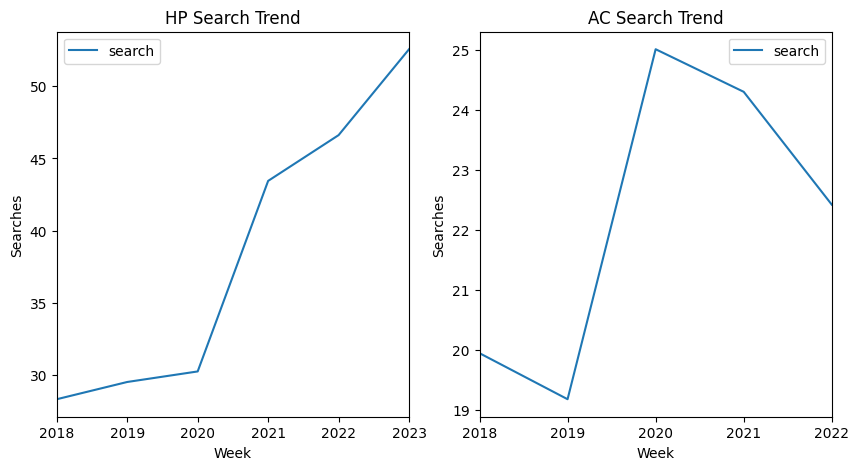

In [80]:
# plot all together

import matplotlib.pyplot as plt

# create a figure window with two axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# plot data on first axis
hp_year.plot(x='week', y='search', ax=ax1)
ax1.set_title('HP Search Trend')

# plot data on second axis
ac_year.plot(x='week', y='search', ax=ax2)
ax2.set_title('AC Search Trend')

# set axis labels and display the plot
ax1.set_xlabel('Week')
ax1.set_ylabel('Searches')
ax2.set_xlabel('Week')
ax2.set_ylabel('Searches')
plt.show()
